In [11]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift
from scipy import signal

In [12]:
with open('unfiltered.pkl', 'rb') as f:
    unfiltered = pickle.load(f)

In [13]:
unfiltered

,mflo1,mflo2
2020-04-22 01:30:19,NaN,0.004
2020-04-22 01:30:20,0.006,0.004
2020-04-22 01:30:21,0.004,0.004
2020-04-22 01:30:22,0.004,0.004
2020-04-22 01:30:23,0.004,0.004
...,...,...
2020-10-22 23:39:21,0.013,0.013
2020-10-22 23:39:22,0.014,0.013
2020-10-22 23:39:23,0.014,0.011
2020-10-22 23:39:24,0.014,0.011


In [14]:
unfiltered = unfiltered['mflo2'].dropna()
index = unfiltered.index.to_numpy()
unfiltered = unfiltered.reset_index(drop=True)

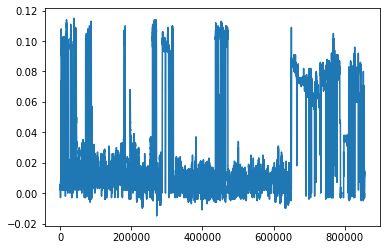

In [15]:
unfiltered.plot();

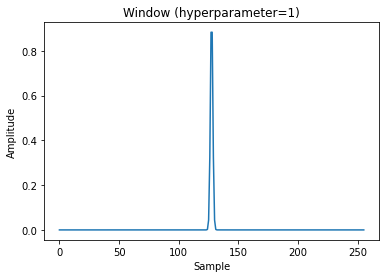

In [72]:
sd = 1
ws = 256
window = signal.windows.gaussian(ws, std=sd)
# window = signal.windows.triang(ws)
# window = signal.windows.exponential(ws, tau=sd)
plt.plot(window)
plt.title(r"Window (hyperparameter={})".format(sd))
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show();

In [73]:
# find noises with n-sample gap between noise
gap = 100
uf = unfiltered[unfiltered==0].index.to_numpy()
uf = [uf[e] for e in np.where(np.diff(uf) > gap)[0]]
uf[0]

21218

In [96]:
center = 21218

Noise: 133


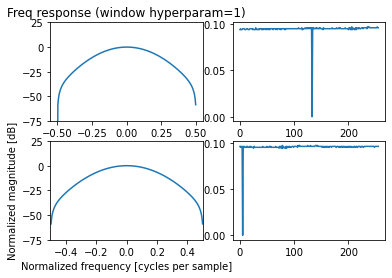

Noise: 132


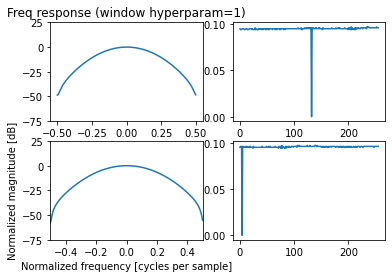

Noise: 131


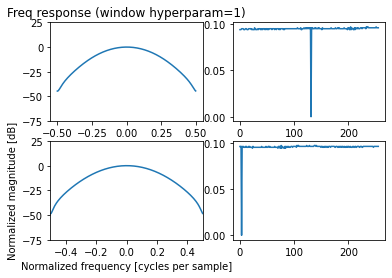

Noise: 130


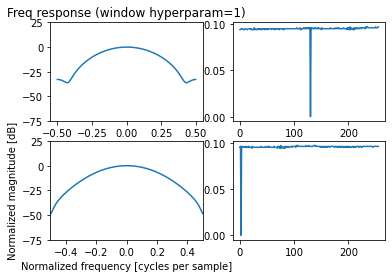

Noise: 129


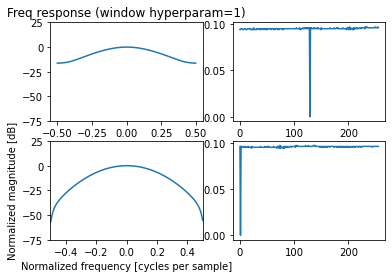

Noise: 128


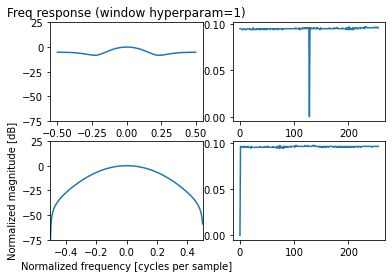

Noise: 127


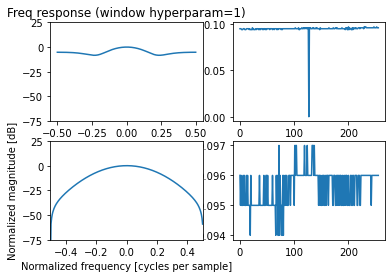

Noise: 126


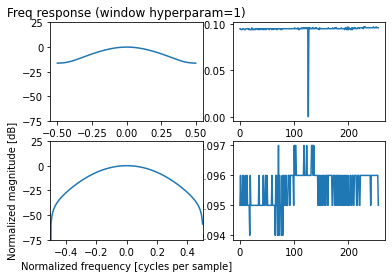

Noise: 125


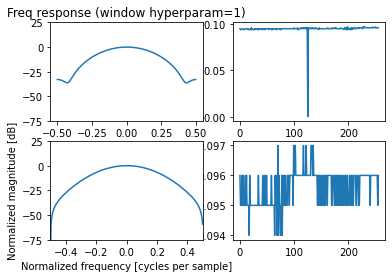

Noise: 124


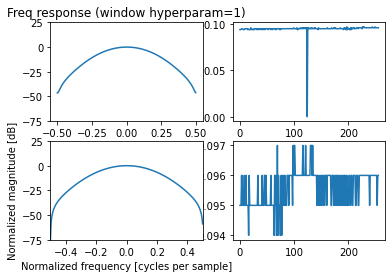

Noise: 123


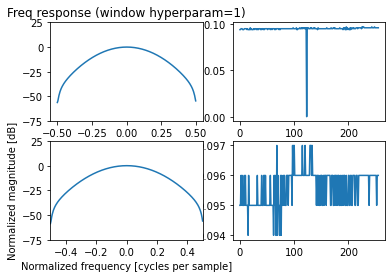

In [98]:
padding = 5
for start in range(center-padding, center+padding+1):
    plt.figure()

    plt.subplot(2, 2, 2)
    plt.plot(unfiltered.to_numpy()[start-ws//2:start+ws//2])

    zeroes = np.where(unfiltered.to_numpy()[start-ws//2:start+ws//2]==0)[0]
    print('Noise:', *zeroes[zeroes.shape[0]//2-2:zeroes.shape[0]//2+3])

    plt.subplot(2, 2, 4)
    plt.plot(unfiltered.to_numpy()[start:start+ws])

    plt.subplot(2, 2, 1)
    A = fft(unfiltered.to_numpy()[start-ws//2:start+ws//2] * window) / (len(window)/2.0)
    freq = np.linspace(-0.5, 0.5, len(A))
    response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
    plt.plot(freq, response)
    plt.title(r"Freq response (window hyperparam={})".format(sd))
    plt.ylim(-75, 25)

    plt.subplot(2, 2, 3)
    A = fft(unfiltered.to_numpy()[start:start+ws] * window) / (len(window)/2.0)
    freq = np.linspace(-0.5, 0.5, len(A))
    response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
    plt.plot(freq, response)
    plt.axis([-0.5, 0.5, -120, 0])
    plt.ylabel("Normalized magnitude [dB]")
    plt.xlabel("Normalized frequency [cycles per sample]")
    plt.ylim(-75, 25)

    plt.show();